# Imports

In [66]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

import json

# Loading data

In [139]:
def load_results(src_lang, tgt_lang):
    json_fn = '../data/tatoeba/' + src_lang + '-' + tgt_lang + "_results.json"
    with open(json_fn, 'r') as json_file:
        results = json.load(json_file)
        json_file.close()
        
    
    return results

def preprocess(results):
    df = pd.DataFrame(results).transpose()
    df = df.fillna(0)
    df.index.name = 'word'
    
    df['characters'] = df.index.map(lambda w: len(w))
    
    noise = np.random.normal(0., 0.00001, [len(df)])
    df['count_bins'] = pd.cut(df['count'], bins=[0,1,10,100,10000], labels=['1', '2-10', '10-100', '>100'])
    df['characters_bins'] = pd.cut(df['characters'],bins=[0,5, 10, 15, 10000], labels=['<=5', '5-10', '10-15', '>15'])
    df = df.sort_values(by=['count'])
    
    df['accuracy'] = df['correct'] / df['count']
    return df
    

In [140]:
results_de = load_results("en", "de")
results_he = load_results("en", "he")

df_de = preprocess(results_de)
df_he = preprocess(results_he)


array([[<AxesSubplot:title={'center':'characters'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

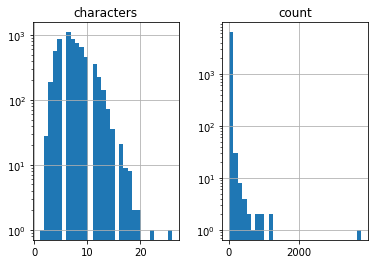

In [141]:
df_de.hist(column=['characters', 'count'], bins=30, log=True)

array([[<AxesSubplot:title={'center':'characters'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

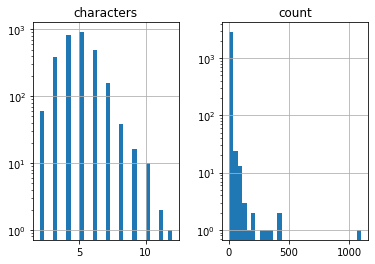

In [142]:
df_he.hist(column=['characters', 'count'], bins=30, log=True)

In [143]:
df_de

,count,correct,tokens,characters,count_bins,characters_bins,accuracy
word,,,,,,,
Krieger,1.0,1.0,1.0,7,1,5-10,1.000000
Osmanischen,1.0,0.0,3.0,11,1,10-15,0.000000
Reihen,1.0,1.0,1.0,6,1,5-10,1.000000
Spalten,1.0,0.0,1.0,7,1,5-10,0.000000
Herunterladen,1.0,1.0,1.0,13,1,10-15,1.000000
...,...,...,...,...,...,...,...
und,939.0,923.0,1.0,3,>100,<=5,0.982961
das,965.0,808.0,1.0,3,>100,<=5,0.837306
du,1217.0,896.0,1.0,2,>100,<=5,0.736237


In [144]:
df_he

,count,correct,tokens,characters,count_bins,characters_bins,accuracy
word,,,,,,,
יומי,1.0,1.0,1.0,4,1,<=5,1.000000
נורא,1.0,1.0,1.0,4,1,<=5,1.000000
אי,1.0,1.0,1.0,2,1,<=5,1.000000
רקובה,1.0,1.0,2.0,5,1,<=5,1.000000
עשרים,1.0,0.0,1.0,5,1,<=5,0.000000
...,...,...,...,...,...,...,...
היא,308.0,301.0,1.0,3,>100,<=5,0.977273
מה,335.0,322.0,1.0,2,>100,<=5,0.961194
זה,413.0,381.0,1.0,2,>100,<=5,0.922518


# Result Plots German

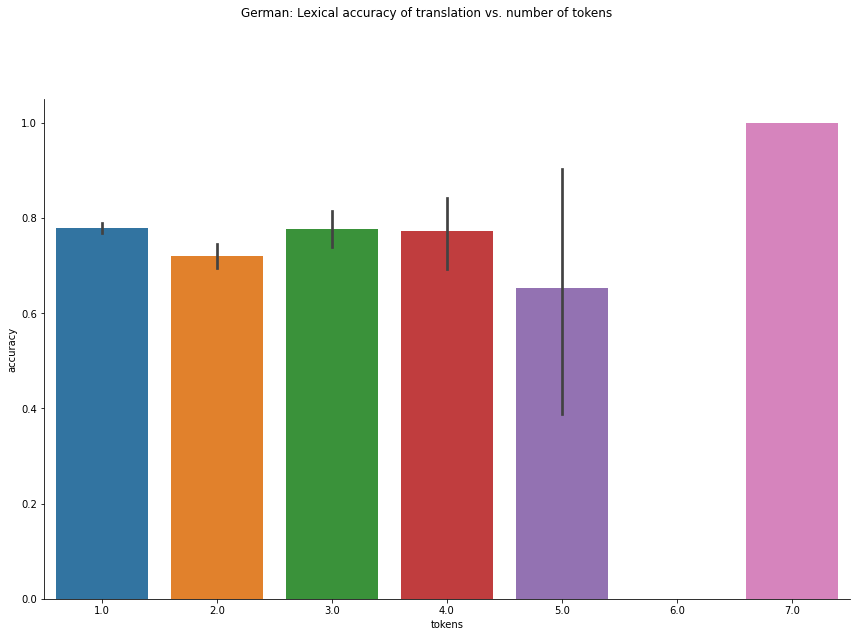

In [145]:
g = sns.catplot(x="tokens", y="accuracy",
                data=df_de, kind="bar",
                height=8, aspect=1.5)
fig = g.fig
axes = g.axes

fig.suptitle('German: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

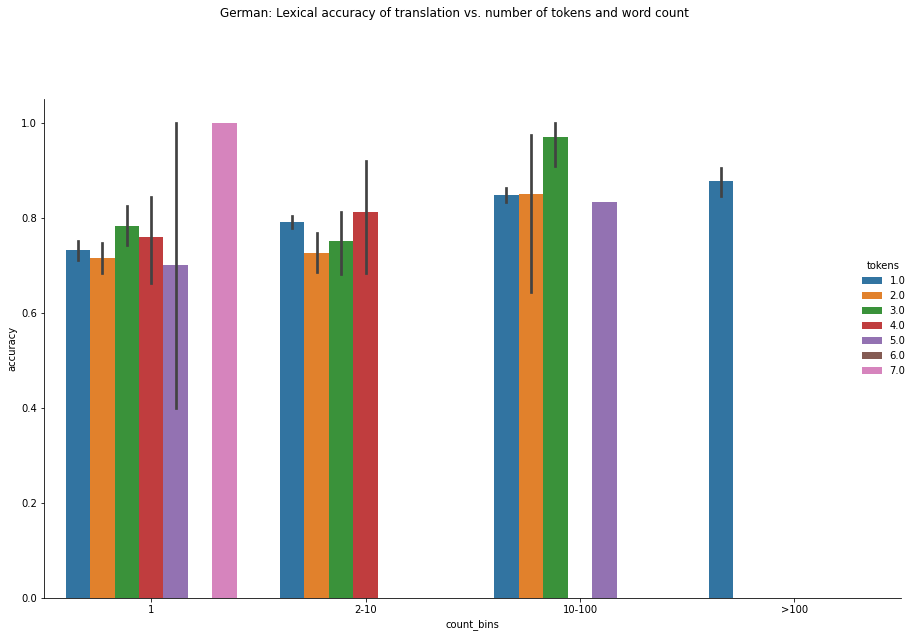

In [146]:
g = sns.catplot(x="count_bins", y="accuracy",
                hue="tokens",
                data=df_de, kind="bar",
                height=8, aspect=1.5, legend=True)
fig = g.fig
axes = g.axes
fig.suptitle('German: Lexical accuracy of translation vs. number of tokens and word count', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

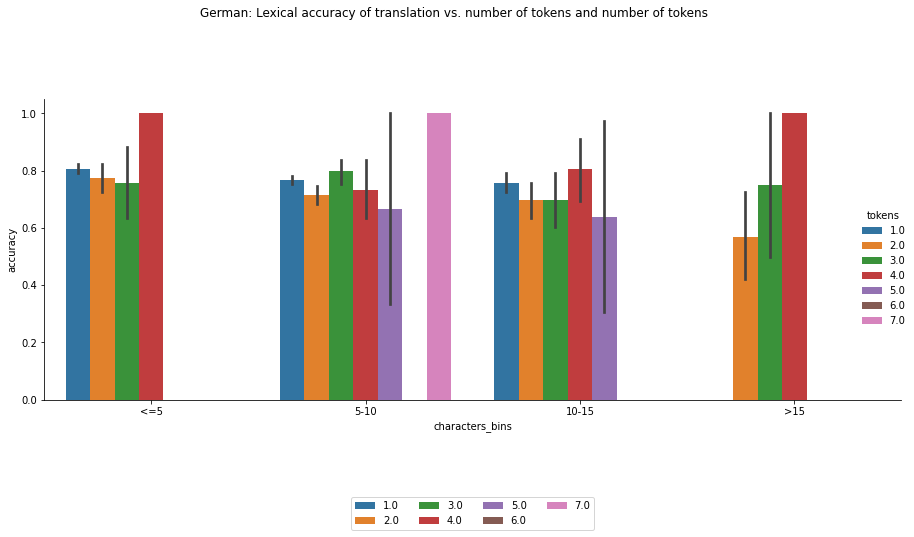

In [147]:
g = sns.catplot(x="characters_bins", y="accuracy",
                hue="tokens",
                data=df_de, kind="bar",
                height=8, aspect=1.5, legend=True)
fig = g.fig
axes = g.axes
axes[0,0].legend(ncol=4,loc='lower center', bbox_to_anchor=(.5, -0.45))
fig.suptitle('German: Lexical accuracy of translation vs. number of tokens and number of tokens', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

# Result Plots Hebrew

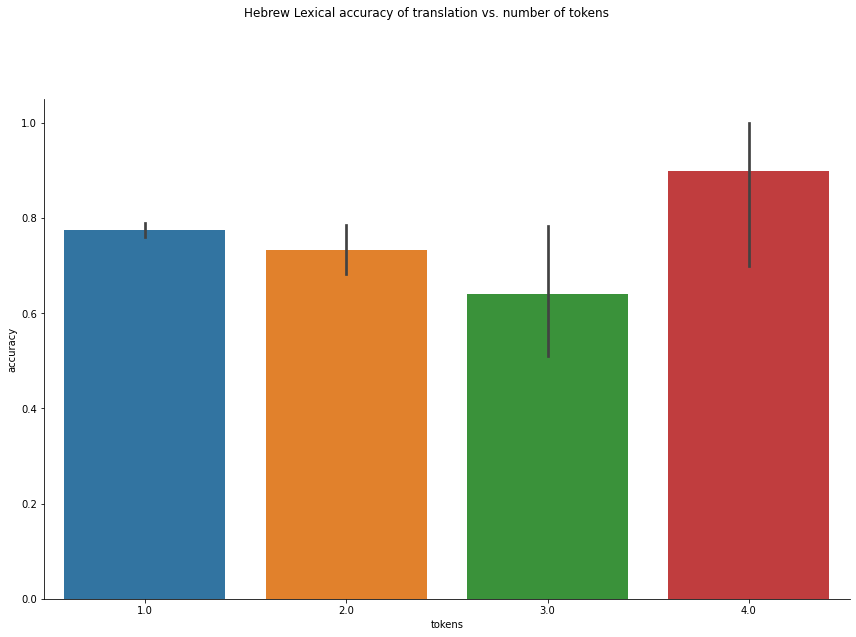

In [149]:
g = sns.catplot(x="tokens", y="accuracy",
                data=df_he, kind="bar",
                height=8, aspect=1.5)
fig = g.fig
axes = g.axes

fig.suptitle('Hebrew Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

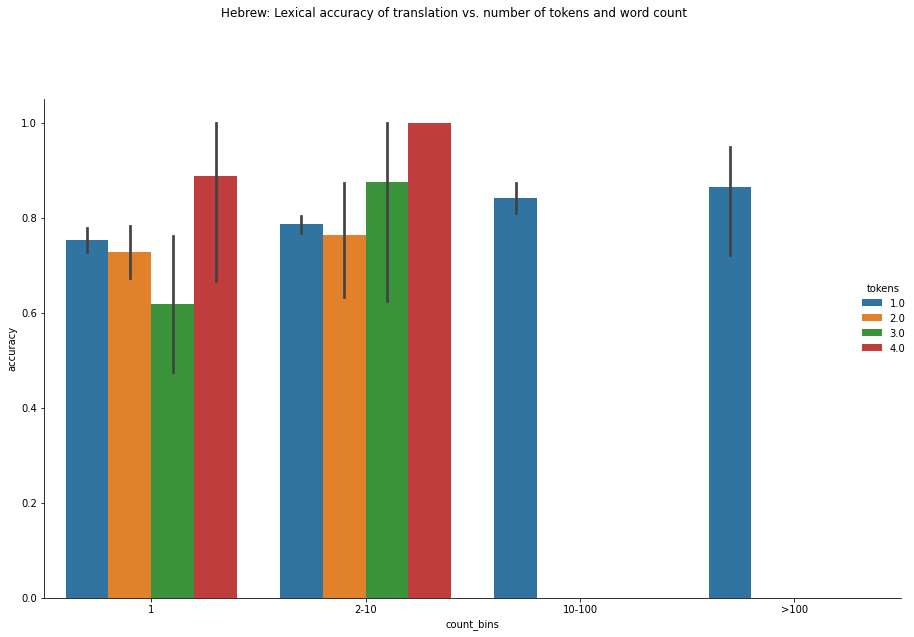

In [150]:
g = sns.catplot(x="count_bins", y="accuracy",
                hue="tokens",
                data=df_he, kind="bar",
                height=8, aspect=1.5, legend=True)
fig = g.fig
axes = g.axes
fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens and word count', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

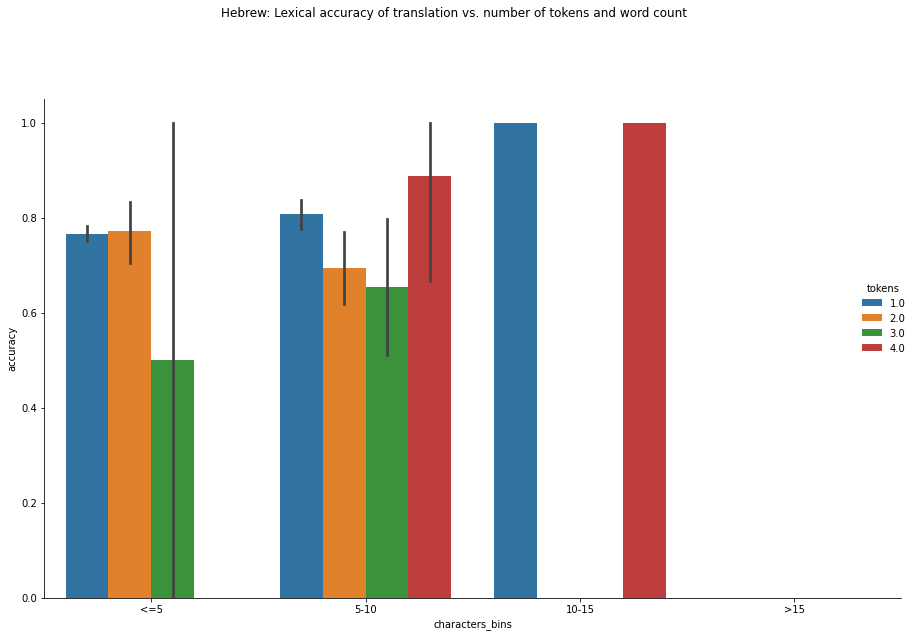

In [151]:
g = sns.catplot(x="characters_bins", y="accuracy",
                hue="tokens",
                data=df_he, kind="bar",
                height=8, aspect=1.5, legend=True)
fig = g.fig
axes = g.axes
fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens and word count', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()